# 小波变换
图像增强

In [4]:
from scipy.interpolate import interp2d,RegularGridInterpolator
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 这里使用随机数据作为示例，实际应用中应替换为从ArcGIS Pro数据库导出的栅格数据
# data = np.random.rand(128, 128)  # 示例数据，实际数据应为您的栅格数据
data = np.load(r"C:\Users\Runker\Desktop\transfer_test\sra.npy")


In [14]:

# 计算数组中所有非零元素的均值
mean_value = np.mean(data[data != 0])
# 将数组中值为0的元素替换为均值
data[data == 0] = mean_value

In [15]:
data

array([[12955.248, 12955.248, 12955.248, ..., 12955.248, 12955.248,
        12955.248],
       [12955.248, 12955.248, 12955.248, ..., 12955.248, 12955.248,
        12955.248],
       [12955.248, 12955.248, 12820.5  , ..., 12973.5  , 12963.5  ,
        12955.248],
       ...,
       [12955.248, 12955.248, 13042.25 , ..., 13271.583, 13280.5  ,
        12955.248],
       [12955.248, 12955.248, 12955.248, ..., 12955.248, 12955.248,
        12955.248],
       [12955.248, 12955.248, 12955.248, ..., 12955.248, 12955.248,
        12955.248]], dtype=float32)

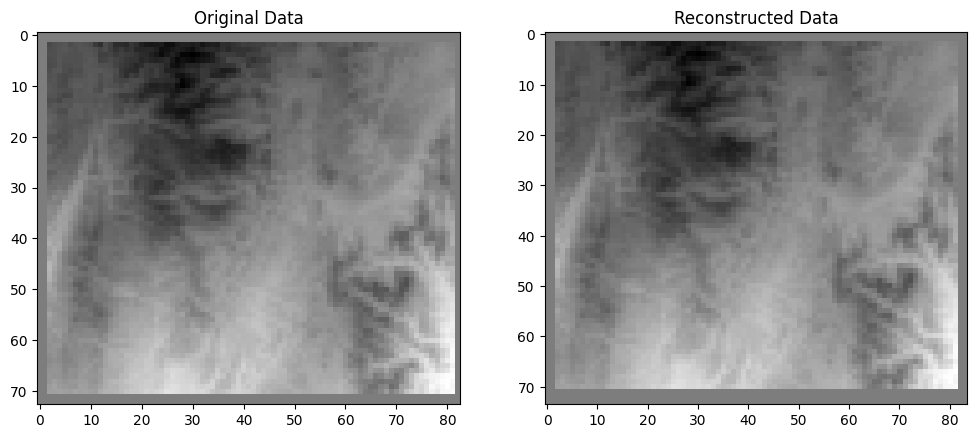

In [16]:
def wavelet_transform_reconstruction(data, wavelet='haar', level=1):
    """
    对二维数据进行小波变换和重构
    :param data: 输入的二维数组
    :param wavelet: 使用的小波类型
    :param level: 小波分解的级别
    :return: 小波重构后的二维数组
    """
    # 对数据进行二维小波分解
    coeffs = pywt.wavedec2(data, wavelet, level=level)
    # 重构信号（此处未修改系数，直接重构；实际应用中可能需要根据需要修改系数）
    reconstructed_data = pywt.waverec2(coeffs, wavelet)
    return reconstructed_data

# 应用小波变换和重构
reconstructed_data = wavelet_transform_reconstruction(data, wavelet='haar', level=2)

# 可视化原始数据和重构数据
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_data, cmap='gray')
plt.title('Reconstructed Data')
plt.show()


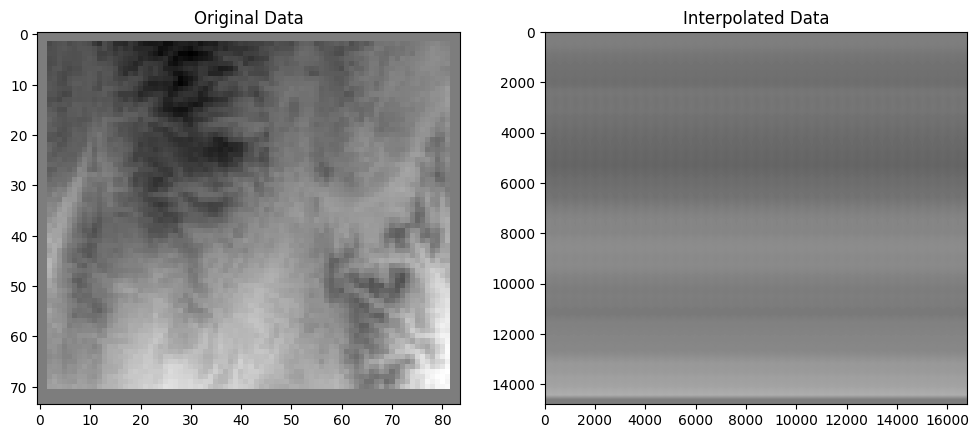

In [25]:


# 使用重构后的数据
data = reconstructed_data  # 这里假设reconstructed_data是您已经有的重构数据

# 计算插值后的新尺寸，这里假设放大比例为从1KM到5M，即200倍
# 注意：由于内存限制，这里使用一个较小的示例放大比例
# 在实际应用中，您需要根据您的内存容量和数据处理能力来调整
new_size_x, new_size_y = data.shape[0] * 200, data.shape[1] * 200  # 示例中放大2倍

# 生成原始数据的坐标网格
x = np.linspace(0, 1, data.shape[0])
y = np.linspace(0, 1, data.shape[1])

# 创建插值函数，RegularGridInterpolator 需要原始坐标轴的点作为输入
interpolator = RegularGridInterpolator((x, y), data)

# 生成新的坐标网格
x_new = np.linspace(0, 1, new_size_x)
y_new = np.linspace(0, 1, new_size_y)
X_new, Y_new = np.meshgrid(x_new, y_new)

# 应用插值函数
points_new = np.array([X_new.ravel(), Y_new.ravel()]).T  # 将新网格的坐标转换为插值函数所需的形式
data_interpolated = interpolator(points_new).reshape(new_size_x, new_size_y)

# 可视化原始数据和插值后的数据
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.imshow(data_interpolated, cmap='gray')
plt.title('Interpolated Data')
plt.show()


In [19]:
data_interpolated

array([[12955.24707031, 12955.24707031, 12955.24707031, ...,
        12955.24609375, 12955.24609375, 12955.24609375],
       [12955.24609375, 12955.24609375, 12955.24609375, ...,
        12955.24679323, 12955.24679804, 12955.24680286],
       [12955.24680768, 12955.2468125 , 12955.24681731, ...,
        12955.24707031, 12955.24707031, 12955.24707031],
       ...,
       [12955.24649252, 12955.24649734, 12955.24650215, ...,
        12955.24707031, 12955.24707031, 12955.24707031],
       [12955.24707031, 12955.24707031, 12955.24707031, ...,
        12955.24707031, 12955.24707031, 12955.24707031],
       [12955.24707031, 12955.24707031, 12955.24707031, ...,
        12955.24707031, 12955.24707031, 12955.24707031]])

In [20]:
data_interpolated.shape

(14800, 16800)

In [13]:
import arcpy
import numpy as np
import pywt
from scipy.interpolate import RegularGridInterpolator
from arcpy import env
from arcpy.ia import *

# 设置环境
env.workspace = r'D:\ArcGISProjects\workspace\shbyq\MyProject.gdb'  # 修改为您的工作空间路径
input_raster_path = 'Extract_SRA3'  # 原始栅格文件名
output_raster_path = 'Extract_SRA7'  # 输出栅格文件名

In [14]:
# 读取栅格数据为NumPy数组
input_raster = Raster(input_raster_path)
array = arcpy.RasterToNumPyArray(input_raster)

In [15]:
# 计算数组中所有非零元素的均值
mean_value = np.mean(array[array != 0])
# 将数组中值为0的元素替换为均值
array[array == 0] = mean_value

In [18]:
# 应用小波变换和重构
coeffs = pywt.wavedec2(array, 'haar', level=2)
reconstructed_data = pywt.waverec2(coeffs, 'haar')

# 插值以提高分辨率，示例中仅提高到原来的2倍
new_size = (reconstructed_data.shape[0] * 2, reconstructed_data.shape[1] * )
x = np.linspace(0, 1, reconstructed_data.shape[0])
y = np.linspace(0, 1, reconstructed_data.shape[1])
interpolator = RegularGridInterpolator((x, y), reconstructed_data)
x_new = np.linspace(0, 1, new_size[0])
y_new = np.linspace(0, 1, new_size[1])
X_new, Y_new = np.meshgrid(x_new, y_new)
points_new = np.array([X_new.ravel(), Y_new.ravel()]).T
interpolated_data = interpolator(points_new).reshape(new_size)

# 将NumPy数组转换回栅格
output_raster = arcpy.NumPyArrayToRaster(interpolated_data, arcpy.Point(input_raster.extent.XMin, input_raster.extent.YMin), input_raster.meanCellWidth * 0.5, input_raster.meanCellHeight * 0.5)
output_raster.save(output_raster_path)

print(f"Processed raster saved to {output_raster_path}")

Processed raster saved to Extract_SRA7
